In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

__author__ = "Peter Nordin"
__license__ = "GPL"
__email__ = "peter.nordin@liu.se"

'''The purpose of this script is to allow easy calulation of the parasitic inductance and/or capacitance that
   will result from the choice of time step and material properties in Hopsan'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from TLMclasses import *

Tdesired: 7.45821694509e-05
     stiff &               Ts &         Par. Ind & Par. Ind (Eq.Mass) &   Par. Cap &       Perc. Mass &  Perc. Stiffness &        Resonance
         0 &            1E-09 &        -0.088984 &      -8.8984E-08 &          0 &          1.6E-05 &          1.6E+13 &                0
         0 &            1E-08 &          -0.0874 &        -8.74E-08 &          0 &           0.0016 &          1.6E+13 &                0
         0 &            1E-07 &            0.071 &          7.1E-08 &          0 &             0.16 &          1.6E+13 &                0
         0 &            1E-06 &           15.911 &       1.5911E-05 &          0 &               16 &          1.6E+13 &                0
         0 &            1E-05 &         1599.911 &      0.001599911 & 1.262177448E-29 &             1600 &          1.6E+13 &                0
         0 &  7.458216945E-05 &        88999.911 &      0.088999911 &          0 &            89000 &          1.6E+13 &                0

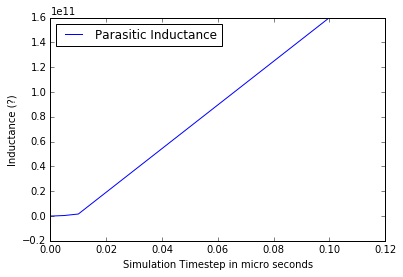

In [2]:
# For a Hydraulic TLM, modelled as a pure capacitance (linear elastic spring), calculate parasitic inductance

# Oil spring
K = 1.6e9
rho = 890
n = 1
X = 0.1
A0 = 0.001

waveSpeed = np.sqrt(K/rho)
Tdesired = X/waveSpeed
volume = A0*X

Ts = [Tdesired/n, Tdesired/n*2, Tdesired/n*4, Tdesired/n*8, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 1e-1]
Ts = sorted(Ts)

#template = "{0:20} & {1:20} & {2:20} & {3:20} & {4:20} \\\\"
#print(template.format("Time step", "Par. Inductance", "Par. Capacitance", "Percived Mass", "Percived Stiffness"))
print('Tdesired: '+str(Tdesired))
templatehead = "{0:>10} & {1:>16} & {2:>16} & {3:>16} & {4:>10} & {5:>16} & {6:>16} & {7:>16}"
template = "{0:10.5G} & {1:16.10G} & {2:16.10G} & {3:16.10G} & {4:10.10G} & {5:16.10G} & {6:16.10G} & {7:16.10G}"
print(templatehead.format("stiff", "Ts", "Par. Ind", "Par. Ind (Eq.Mass)", "Par. Cap", "Perc. Mass", "Perc. Stiffness", "Resonance"))
paraind = list()
for t in Ts:
    zc_desired = K/volume*t
    tp = TLMHydraulicLine(K, rho, X, A0, zctype='purecapacitance')
    tp.calcStuff(t, n)

    print(template.format(0, t, tp.parasitic.ind, tp.parasitic.ind*A0*A0, tp.parasitic.cap, tp.percived.ind, tp.percived.stiffness, 0))
    paraind.append(tp.parasitic.ind)

fig, axL = plt.subplots()
axL.plot(Ts, paraind, label='Parasitic Inductance')
axL.set_ylabel('Inductance (?)')
axL.set_xlabel('Simulation Timestep in micro seconds')
axL.legend(loc='best')
plt.show()

0.00016148600000000002
0.0002
0.000534134
0.0008
         k &         Ts &         Par. Ind & Par. Ind (Eq.Mass) &               Zc &       Perc. Mass &  Perc. Stiffness &        Resonance
         1 &      1E-12 &            8E-12 &         5.12E-18 &                8 &            8E-12 &            8E+12 &            1E+12
         1 &      1E-11 &            8E-10 &         5.12E-16 &               80 &            8E-10 &            8E+12 &            1E+11
         1 &      1E-10 &            8E-08 &         5.12E-14 &              800 &            8E-08 &            8E+12 &            1E+10
         1 &      1E-09 &            8E-06 &         5.12E-12 &             8000 &            8E-06 &            8E+12 &       1000000000
         1 &      1E-08 &           0.0008 &         5.12E-10 &            8E+04 &           0.0008 &            8E+12 &        100000000
         1 &      1E-07 &             0.08 &         5.12E-08 &            8E+05 &             0.08 &            8E+12 & 

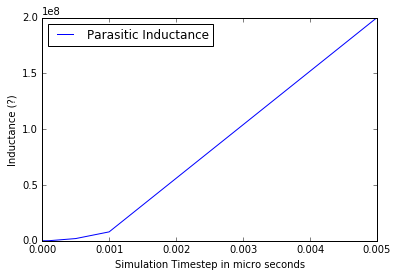

In [3]:
# For a single step TLM Hydraulic Volume (spring) modelled as a pure capacitance (linear elastic spring), calculate parasitic inductance

bulk=1.6e+9
volumeA = (192515+130457)/2*1e-9
print(volumeA)
volume = 2e-4*1+0*1.305e-04+0*2.5e-04
print(volume)
n=1
AAA = (0.000863331+0.000204937)/2 #Affected area, for Eq.Mass calculation
print(AAA)
AA = 0.0008
print(AA)

Tdesired = 1e-12

kvec = [1]

for k in kvec:
    #Ts = [Tdesired/n, Tdesired/n*2, Tdesired/n*4, Tdesired/n*8, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1e-0]
    Ts = [7.733661734E-05, Tdesired/n, Tdesired/n*10, Tdesired/n*100, Tdesired/n*1000, Tdesired/n*10000, 1e-7, 2.5e-7, 5e-7, 7.5e-7, 1e-6, 2.5e-6, 5e-6, 7.5e-6, 1e-5, 2.5e-5, 5e-5, 7.5e-5, 1e-4, 5e-4, 1e-3, 5e-3]
    Ts = sorted(Ts)


    #template = "{0:20} & {1:20} & {2:10} & {3:20} & {4:20} & {5:20} \\\\"
    templatehead = "{0:>10} & {1:>10} & {2:>16} & {3:>16} & {4:>16} & {5:>16} & {6:>16} & {7:>16}"
    template = "{0:10.5G} & {1:10.10G} & {2:16.10G} & {3:16.10G} & {4:16.4G} & {5:16.10G} & {6:16.10G} & {7:16.10G}"
    #print(templatehead.format("k", "Ts", "Par. Ind", "Par. Cap", "Perc. Mass", "Perc. Stiffness", "Resonance"))
    print(templatehead.format("k", "Ts", "Par. Ind", "Par. Ind (Eq.Mass)", "Zc", "Perc. Mass", "Perc. Stiffness", "Resonance"))
    paraind = list()
    for t in Ts:
        #zc_desired = K/volume*t
        tp = TLMHydraulicSpring(bulk, volume, t)
        #tp = TLMMechanicLine(E, rho, X, A, zctype='pureinductance')
        #tp = TLMMechanicLine(E, rho, X, A, zctype='normal')
        tp.calcStuff(t, n)

        #print(template.format(k, t, tp.parasitic.ind, tp.parasitic.cap, tp.percived.ind, tp.percived.stiffness, np.sqrt(tp.percived.stiffness/tp.percived.ind)))
        print(template.format(k, t, tp.parasitic.ind, tp.parasitic.ind*AA*AA, tp.percived.zc, tp.percived.ind, tp.percived.stiffness, np.sqrt(tp.percived.stiffness/tp.percived.ind)))
        #template2 = "{0:>23.5G}  {1:>17.10G}"
        #print(template2.format(tp.percived.zc,tp.parasitic.ind2))
        paraind.append(tp.parasitic.ind)

fig, axL = plt.subplots()
axL.plot(Ts, paraind, label='Parasitic Inductance')
axL.set_ylabel('Inductance (?)')
axL.set_xlabel('Simulation Timestep in micro seconds')
axL.legend(loc='best')
plt.show()

In [4]:
# Calc parasitic equivalent mass for two purely capacitive hydraulic volumes

T=1e-5
bulk=1.6e+9
V1=0.13e-3
V2=0.25e-3
A=8e-4

Lpara = T*T*bulk/V1
print(Lpara*A*A)
Lpara = T*T*bulk/V2
print(Lpara*A*A)

0.000787692307692308
0.0004096000000000001
